In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\dataset\Customer Churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blank with 0 as tenure is 0 no total cgharges are recorded 

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# checking for any duplicates in data 
df.duplicated().sum()
df["customerID"].duplicated().sum()

0

In [ ]:
# converted 0 and 1 values of senior citizens to yes/no......... 

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]= df["SeniorCitizen"].apply(conv)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


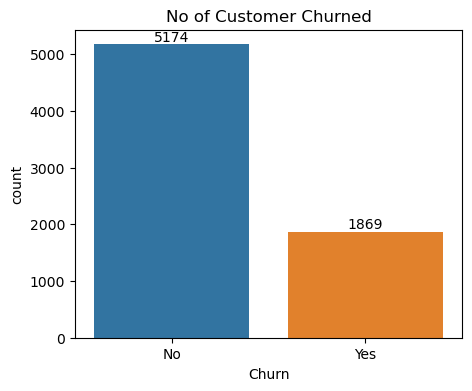

In [16]:
plt.figure(figsize = (5,4))
ax=sns.countplot(x="Churn" , data = df)
ax.bar_label(ax.containers[0])
plt.title("No of Customer Churned")
plt.show()

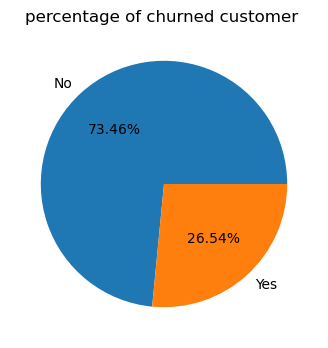

In [5]:
plt.figure(figsize = (4,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index , autopct="%1.2f%%")
plt.title("percentage of churned customer ")
plt.show()

from the given pie chart we can conclude that 26.54% of customer have churned out 



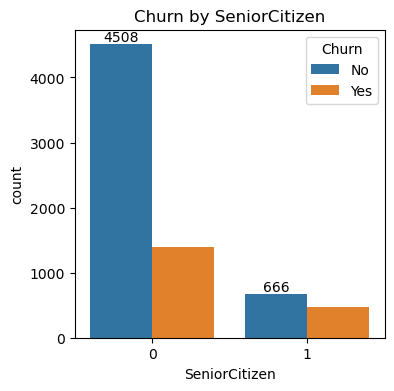

In [19]:
plt.figure(figsize = (4,4))
ax=sns.countplot(x="SeniorCitizen" , data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

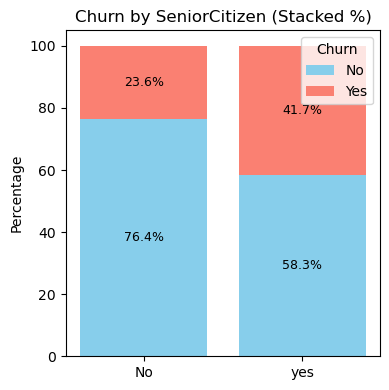

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a crosstab of counts
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(4, 4))
bottom = np.zeros(len(percentages))

colors = ['skyblue', 'salmon']
for idx, churn_status in enumerate(percentages.columns):
    bar = ax.bar(
        percentages.index,
        percentages[churn_status],
        bottom=bottom,
        label=churn_status,
        color=colors[idx]
    )
    # Add labels
    for i, p in enumerate(bar):
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2, bottom[i] + height / 2,
                    f'{height:.1f}%', ha='center', va='center', fontsize=9)
    bottom += percentages[churn_status]

# Formatting
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'yes'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by SeniorCitizen (Stacked %)')
ax.legend(title='Churn')

plt.tight_layout()
plt.show()


Senior citizens are more likely to churn (41.7%) compared to non-senior citizens (23.6%). comparitive a greater percentage of SeniorCitizen have churned out 

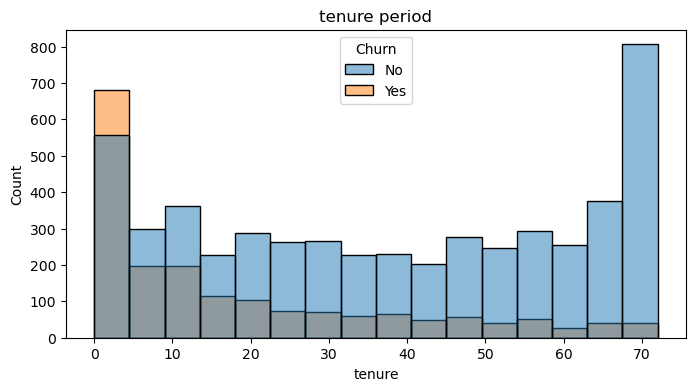

In [16]:
plt.figure(figsize =(8,4))
sns.histplot(x="tenure" , data=df , hue="Churn")
plt.title("tenure period")
plt.show()

customer who have used service for long time have stayed and who used for short term have churned out

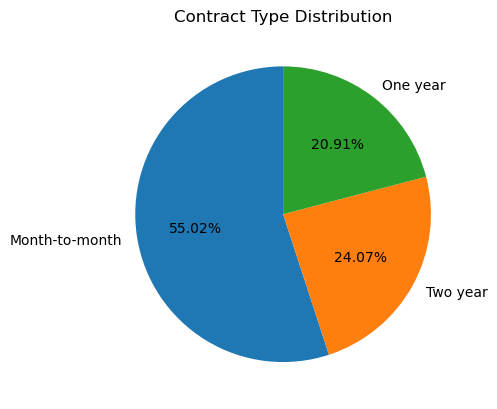

In [41]:
contract_counts = df["Contract"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct="%1.2f%%", startangle=90)
plt.title("Contract Type Distribution")
plt.show()


In [32]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

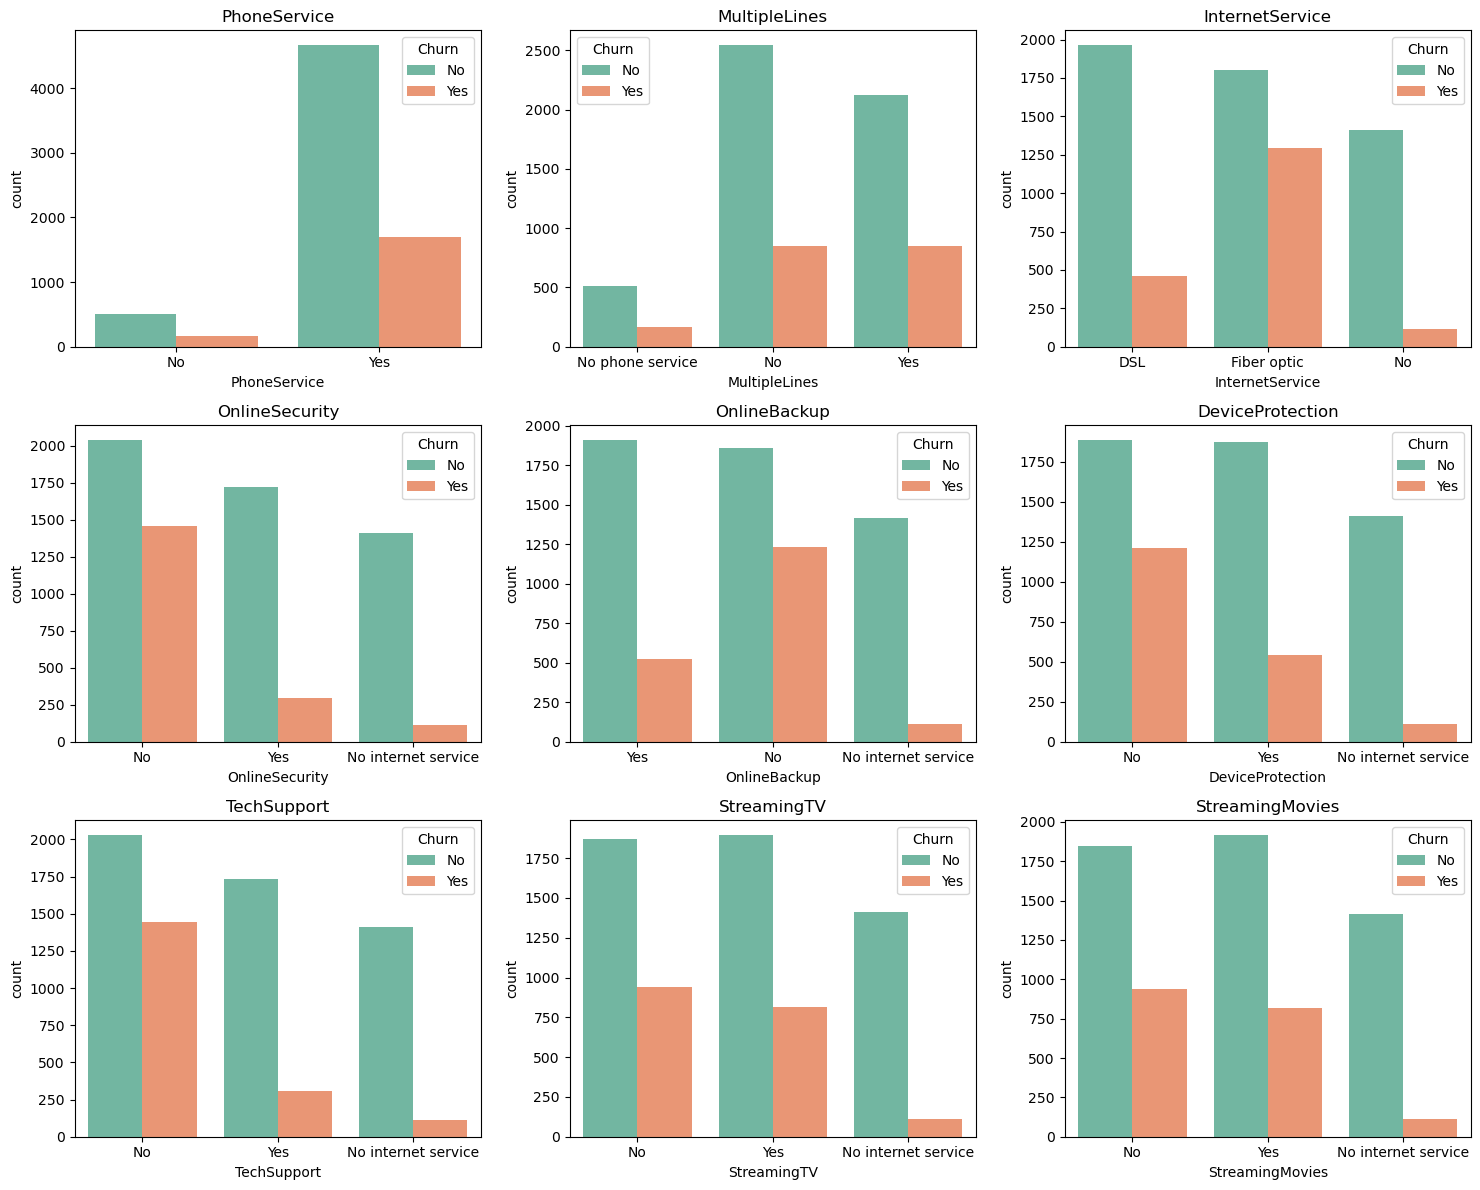

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily loop through

# Plot each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2",hue="Churn")
    axes[i].set_title(col)
    axes[i].tick_params(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()


Customers without value-added services (like tech support, security, and backups) show higher churn rates, especially those using fiber optic internet.

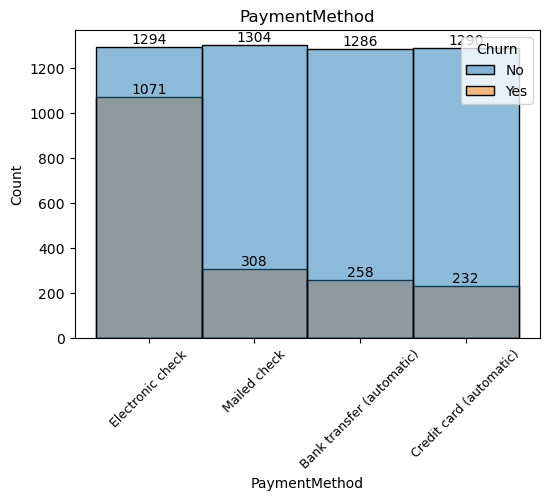

In [57]:
plt.figure(figsize =(6,4))
ax=sns.histplot(x="PaymentMethod" , data=df , hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("PaymentMethod")
plt.xticks(rotation = 45 , fontsize=9)
plt.show()

customer is likely to churn when they are using electronic check as payment method 